In [98]:
import sys
import math
!{sys.executable} -m pip install numpy wheel pandas matplotlib seaborn pyecharts==0.5.11 pyecharts_snapshot==0.1.9

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize

plt.style.use('ggplot')

from pylab import mpl
import matplotlib.font_manager as font_manager 
font_dirs = ['.']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)
plt.rcParams['font.family'] = 'SimHei'
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline

<ipython-input-98-e6230ff1cd65>:17: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [60]:
data = pd.read_csv('data_sample.csv')

In [61]:
# 数据清洗(按列清理)
# 1. 去掉“_id”列
data = data.drop(columns='_id')

In [62]:
# 2. bathroom_num
data['bathroom_num'].unique()

array([2, 1, 3, 5, 0, 4, 9, 7, 6, 8])

In [63]:
data[data['bathroom_num'].isin(['8','9','11'])]

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,rent_price_unit,resblock_name,type
1206,9,9,北七家,北京,昌平,NaN,东 南 西 北,5,精装,整租 · 精装修独栋别墅，家具家电齐全，可直接入住！,40.146554,9室5厅9卫,116.418277,https://m.lianjia.com/chuzu/bj/zufang/BJ203027...,544,40000,元/月,麦卡伦地,整租
3778,8,6,龙柏,上海,闵行,528.0,南 北,3,近地铁,整租 · 性价别墅，可整租可分层出租，价格可谈，看房方便！,31.186340,6室3厅8卫,121.373958,https://m.lianjia.com/chuzu/sh/zufang/SH215562...,949,75000,元/月,汇金公寓,整租
6152,8,20,滨江东,广州,海珠,968.0,北,2,公寓 近地铁 精装 独立阳台 随时看房,合租 · 珠江广场 20室2厅 复式,23.108886,20室2厅8卫,113.316313,https://m.lianjia.com/chuzu/gz/zufang/GZ202833...,15,2500,元/月,珠江广场,合租
7540,8,20,滨江东,广州,海珠,968.0,南,2,公寓 近地铁 精装 新上 随时看房,合租 · 珠江广场 20室2厅 复式,23.108886,20室2厅8卫,113.316313,https://m.lianjia.com/chuzu/gz/zufang/GZ219842...,10,1300,元/月,珠江广场,合租
8883,8,9,白云大道南,广州,白云,594.0,南 北,3,近地铁,珠江岭南苑 南北向 视野开阔景观好,23.202732,9室3厅8卫,113.286666,https://m.lianjia.com/chuzu/gz/zufang/GZ202798...,500,80000,元/月,珠江岭南苑,整租


In [64]:
# 3. bedroom_num
data['bedroom_num'].unique()

array([ 3,  2,  1,  4,  6,  5,  8,  9,  7, 20,  0, 13, 10])

In [65]:
# 没有异常数据，只是很多10室以上都是专门用来合租的
data[data['bedroom_num'].isin(['10','11','12','13','14','15','20'])]

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,rent_price_unit,resblock_name,type
6152,8,20,滨江东,广州,海珠,968.0,北,2,公寓 近地铁 精装 独立阳台 随时看房,合租 · 珠江广场 20室2厅 复式,23.108886,20室2厅8卫,113.316313,https://m.lianjia.com/chuzu/gz/zufang/GZ202833...,15,2500,元/月,珠江广场,合租
7540,8,20,滨江东,广州,海珠,968.0,南,2,公寓 近地铁 精装 新上 随时看房,合租 · 珠江广场 20室2厅 复式,23.108886,20室2厅8卫,113.316313,https://m.lianjia.com/chuzu/gz/zufang/GZ219842...,10,1300,元/月,珠江广场,合租
9647,3,13,横岗,深圳,龙岗区,10.0,南,1,月租 近地铁 精装 新上 随时看房,合租 · 振业城 13室1厅,22.642763,13室1厅3卫,114.185174,https://m.lianjia.com/chuzu/sz/zufang/SZ219611...,15,1480,元/月,振业城,合租
10814,7,10,布吉大芬,深圳,龙岗区,582.0,东南,3,近地铁,龙泉别墅 10室3厅 25000元,22.622112,10室3厅7卫,114.151512,https://m.lianjia.com/chuzu/sz/zufang/SZ213328...,333,25000,元/月,龙泉别墅,整租


In [66]:
# 4. distance
data['frame_orientation'].unique()  # 这个数据太乱了，要用的时候再处理吧

array(['南 北', '北', '东', '东 南', '西南 东北', '西', '南', '南 西', '西 北', '东 西',
       '东 南 西', '西北', '西南', '东北', '东 南 北', '东南', '东 西 北', '西南 北', '东南 北',
       '南 西 北', '东南 西北', '东 北', '东 东南', '东 南 西 北', '东南 西南', '南 西南',
       '东 北 东北', '东南 西', '西北 东北', '东南 南', '东南 东北', '西南 西北', '西 西北',
       '西北 北', '东南 南 西', '东 西南', '南 西北', '未知', '东南 南 西南', '北 东北',
       '南 西南 西 北', '南 西北 北', '西南 西', '南 西南 北', nan, '西南 西北 北', ' 东 东南',
       ' 南', '南 北 东北', '东 东南 南 西南 西 西北 北 东北', '东 东南 西南', '东 东北',
       '东 东南 南 西南 西 北', '东 东南 南 西 北', ' 东南', '东 东南 南 西南 西北', '东 东南 南 西南',
       '东 东南 南', '东南 南 西 西北', '东 西北', '西南 西 西北', '东 东南 南 西 西北', '南 西 西北',
       '东南 南 西南 西', '东南 西北 北', '东南 西南 西北 北', '东 东南 东北', '东 东南 西',
       '东南 西南 西 西北', '东南 南 西北', '东 东南 南 西北', '东南 西南 东北', '东南 南 北',
       '东 东南 南 西南 北', '东 南 西南', '东南 南 西 西北 北', '东 南 西 西北', '东南 南 西南 北',
       ' 南 西 北', ' 东北', '西 西北 北', '东 东南 南 西南 西北 北', ' 西南', '南 东北',
       '东 东南 西南 西', '东南 西南 西 西北 北 东北', '东 东南 西北', '东 东南 西南 西北',
       '东南 西南 西 东北', '东 南 西北', '

In [67]:
# 5. hall_num
data['hall_num'].unique()

array([2, 1, 0, 3, 5, 4])

In [145]:
data[data['hall_num'].isin(['6','11'])]

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,...,m_url,rent_area,rent_price_listing,resblock_name,type,aver_price,bin,is_dep,decorated,ct_heating


In [69]:
# 6. rent_area
data.sample(5)['rent_area']

1545     63
6904     59
8091     88
6184     95
485     122
Name: rent_area, dtype: object

In [70]:
# rent_area字段有些填写的是一个范围，比如23-25平房米，后期转换成“float”类型的时候不好转换，考虑取平均值
def get_aver(data):
    if isinstance(data, str) and '-' in data:
        low, high = data.split('-')
        return (int(low)+int(high))/2
    else:
        return int(data)


data['rent_area'] = data['rent_area'].apply(get_aver)

In [71]:
data[data['rent_area'] < 5]

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,rent_price_unit,resblock_name,type


In [72]:
# 房间只有1平米，是异常数据，删去
data = data.drop(data[data['rent_area'] < 5].index)

In [73]:
# 7. rent_price_unit
data['rent_price_unit'].unique()

array(['元/月'], dtype=object)

In [74]:
# 租金都是以“元/月”计算的，所以这一列没用了，可以删了
data = data.drop(columns='rent_price_unit')

In [75]:
# 8. rent_price_listing
data[data['rent_price_listing'].str.contains('-')].sample(3)

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,resblock_name,type
9112,1,1,西乡,深圳,宝安区,NaN,东南 西南 西北 北,0,独栋公寓,职业房东 梦想+Dream House 精致光明大单间 开间,22.587928,1室0厅1卫,113.893807,https://m.lianjia.com/chuzu/sz/apartment/layou...,18.0,1750-2000,NaN,整租
11469,1,1,新安,深圳,宝安区,NaN,西,0,独栋公寓,微家生活公寓 上合店 B户型 开间,22.586591,1室0厅1卫,113.904507,https://m.lianjia.com/chuzu/sz/apartment/layou...,25.5,2050-2200,NaN,整租
9956,1,1,福永,深圳,宝安区,NaN,南,0,独栋公寓,职业房东 博业公寓（凤凰店） 豪华向北单间 开间,22.695650,1室0厅1卫,113.841121,https://m.lianjia.com/chuzu/sz/apartment/layou...,31.0,1100-1200,NaN,整租


In [76]:
# 价格是有区间的，需要按照处理rent_area一样的方法处理
data['rent_price_listing'] = data['rent_price_listing'].apply(get_aver)

In [77]:
# 数据类型转换
for col in ['bathroom_num', 'bedroom_num', 'hall_num', 'rent_price_listing']:
    data[col] = data[col].astype(int)

In [78]:
# 'distance', 'latitude', 'longitude'因为有None，需另外处理
def dw_None_dis(data):
    if data is None or data == '' or math.isnan(data):
        return np.nan
    else:
        return int(data)
    

def dw_None_latlon(data):
    if data is None or data == '':
        return np.nan
    else:
        return float(data)            


data['distance'] = data['distance'].apply(dw_None_dis)
data['latitude'] = data['latitude'].apply(dw_None_latlon)
data['longitude'] = data['longitude'].apply(dw_None_latlon)

In [79]:
# 查看数据概况
data.sample(5)

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,resblock_name,type
5620,1,2,世博,上海,浦东,403.0,南 北,0,近地铁,居家装修两房，靠地铁，价格便宜，配套完善。,31.176799,2室0厅1卫,121.491473,https://m.lianjia.com/chuzu/sh/zufang/SH212670...,52.0,5000,上钢十村,整租
11857,2,3,南山中心,深圳,南山区,732.0,东南,2,近地铁,荟芳园，近深大，精装修，9200元月,22.533235,3室2厅2卫,113.935175,https://m.lianjia.com/chuzu/sz/zufang/SZ215780...,120.0,9200,荟芳园,整租
4550,1,2,周浦,上海,浦东,NaN,南,1,NaN,安阁苑精装两房出租，拎包入住，,31.095837,2室1厅1卫,121.596994,https://m.lianjia.com/chuzu/sh/zufang/SH211420...,74.0,3000,安阁苑,整租
5139,2,3,黄浦滨江,上海,黄浦,666.0,南,2,近地铁 精装 双卫生间,整租 · 金外滩花园 3室2厅 23000元,31.228354,3室2厅2卫,121.508003,https://m.lianjia.com/chuzu/sh/zufang/SH219192...,179.0,23000,金外滩花园,整租
1525,1,3,十里堡,北京,朝阳,NaN,东北,1,集中供暖 随时看房,户型方正，精装修三居室，拎包入住,39.921793,3室1厅1卫,116.514014,https://m.lianjia.com/chuzu/bj/zufang/BJ215184...,88.0,7500,甘露西园,整租


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bathroom_num        12000 non-null  int64  
 1   bedroom_num         12000 non-null  int64  
 2   bizcircle_name      11999 non-null  object 
 3   city                12000 non-null  object 
 4   dist                12000 non-null  object 
 5   distance            6794 non-null   float64
 6   frame_orientation   11899 non-null  object 
 7   hall_num            12000 non-null  int64  
 8   house_tag           10124 non-null  object 
 9   house_title         12000 non-null  object 
 10  latitude            11969 non-null  float64
 11  layout              12000 non-null  object 
 12  longitude           11969 non-null  float64
 13  m_url               12000 non-null  object 
 14  rent_area           12000 non-null  float64
 15  rent_price_listing  12000 non-null  int64  
 16  resb

In [81]:
data.to_csv('data_clean.csv', index=False)

问题：
1. 各城市的租房分布怎么样？
2. 城市各区域的房价分布怎么样？
2. 距离地铁口远近有什么关系？
3. 房屋大小对价格的影响如何？
4. 租个人房源好还是公寓好？
5. 精装和简装对房子价格的影响
6. 北方集中供暖对价格的影响
7. 北上广深租房时都看重什么？

### 1. 各城市的租房分布怎么样？

In [82]:
def get_city_zf_loc(city, city_short, col=['longitude', 'latitude', 'dist'], data=data):
    file_name = 'data_' + city_short + '_latlon.csv'
    data_latlon = data.loc[data['city']==city, col].dropna(subset=['latitude', 'longitude'])
    data_latlon['longitude'] = data_latlon['longitude'].astype(str)
    data_latlon['latitude'] = data_latlon['latitude'].astype(str)
    data_latlon['latlon'] = data_latlon['longitude'].str.cat(data_latlon['latitude'], sep=',')
    data_latlon.to_csv(file_name, index=False)
    print(city+'的数据一共有{}条'.format(data_latlon.shape[0]))

In [83]:
get_city_zf_loc('北京', 'bj', ['longitude','latitude', 'dist'])
get_city_zf_loc('上海', 'sh', ['longitude','latitude', 'dist'])
get_city_zf_loc('广州', 'gz', ['longitude','latitude', 'dist'])
get_city_zf_loc('深圳', 'sz', ['longitude','latitude', 'dist'])

北京的数据一共有2996条
上海的数据一共有2992条
广州的数据一共有2987条
深圳的数据一共有2994条


<ipython-input-84-256673d8a94c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.dropna(subset=['latitude', 'longitude'])[data['city']=='北京']['dist'].value_counts(ascending=True).plot.barh()


<AxesSubplot:>

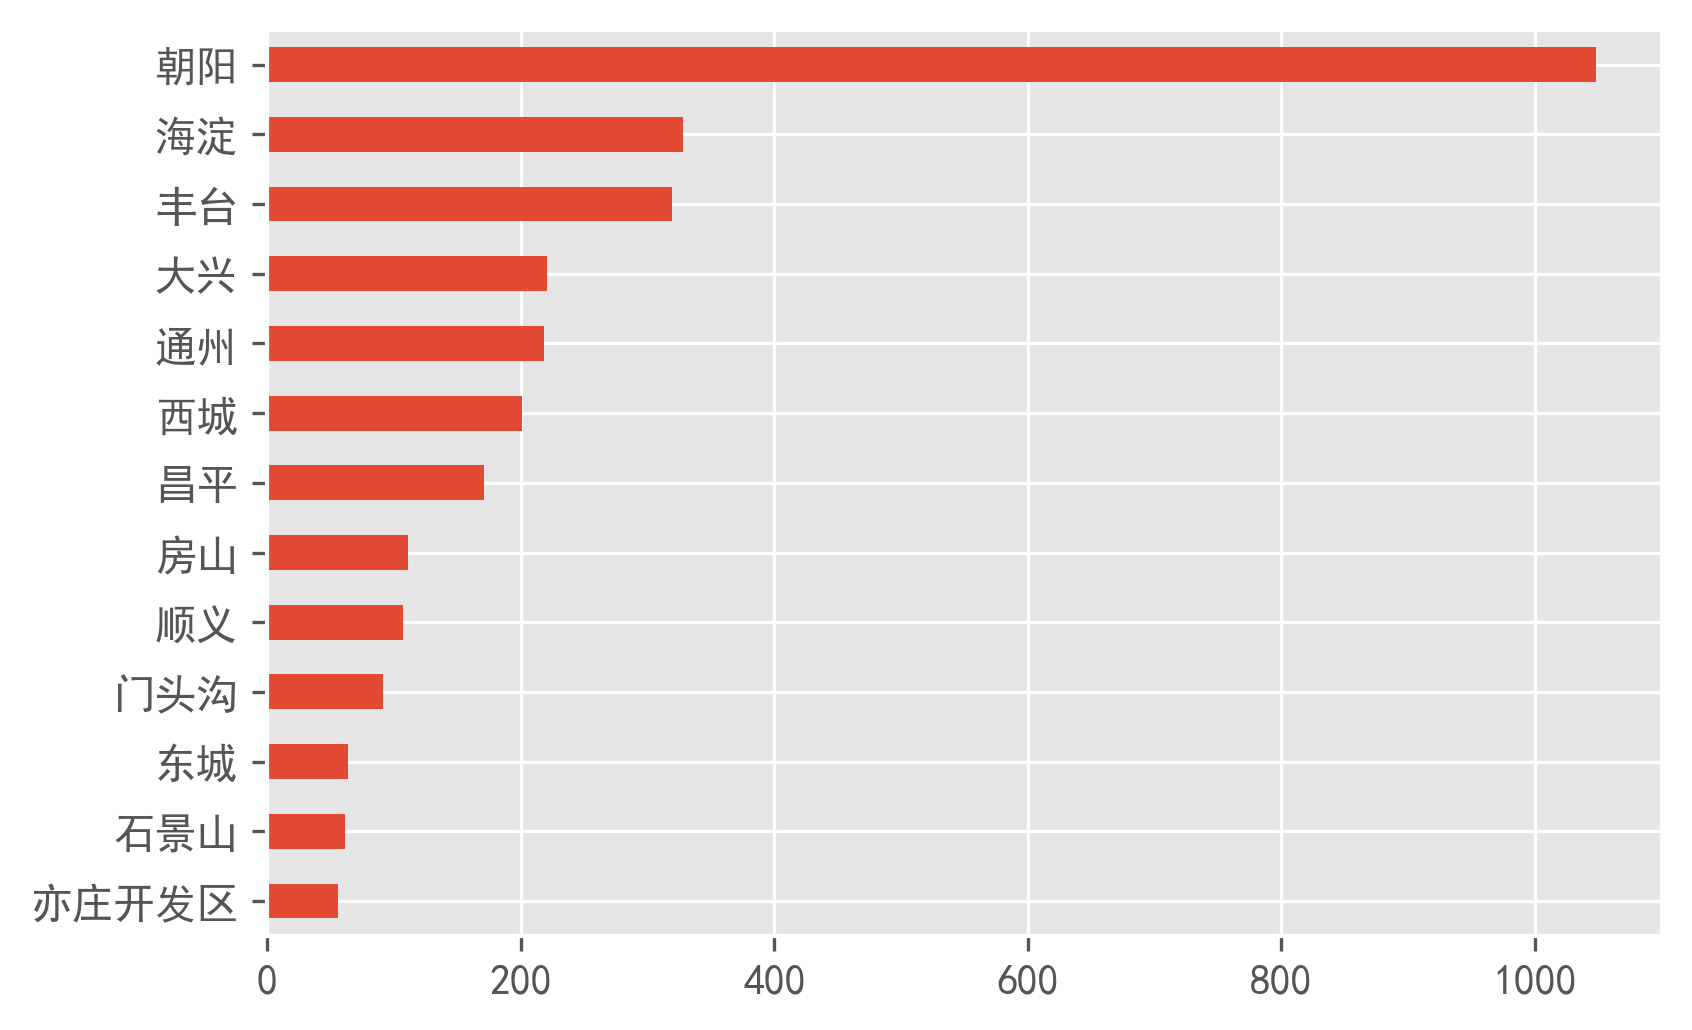

In [84]:
fig = plt.figure(dpi=300)
data.dropna(subset=['latitude', 'longitude'])[data['city']=='北京']['dist'].value_counts(ascending=True).plot.barh()

<ipython-input-85-2d0ff3883743>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.dropna(subset=['latitude', 'longitude'])[data['city']=='上海']['dist'].value_counts(ascending=True).plot.barh()


<AxesSubplot:>

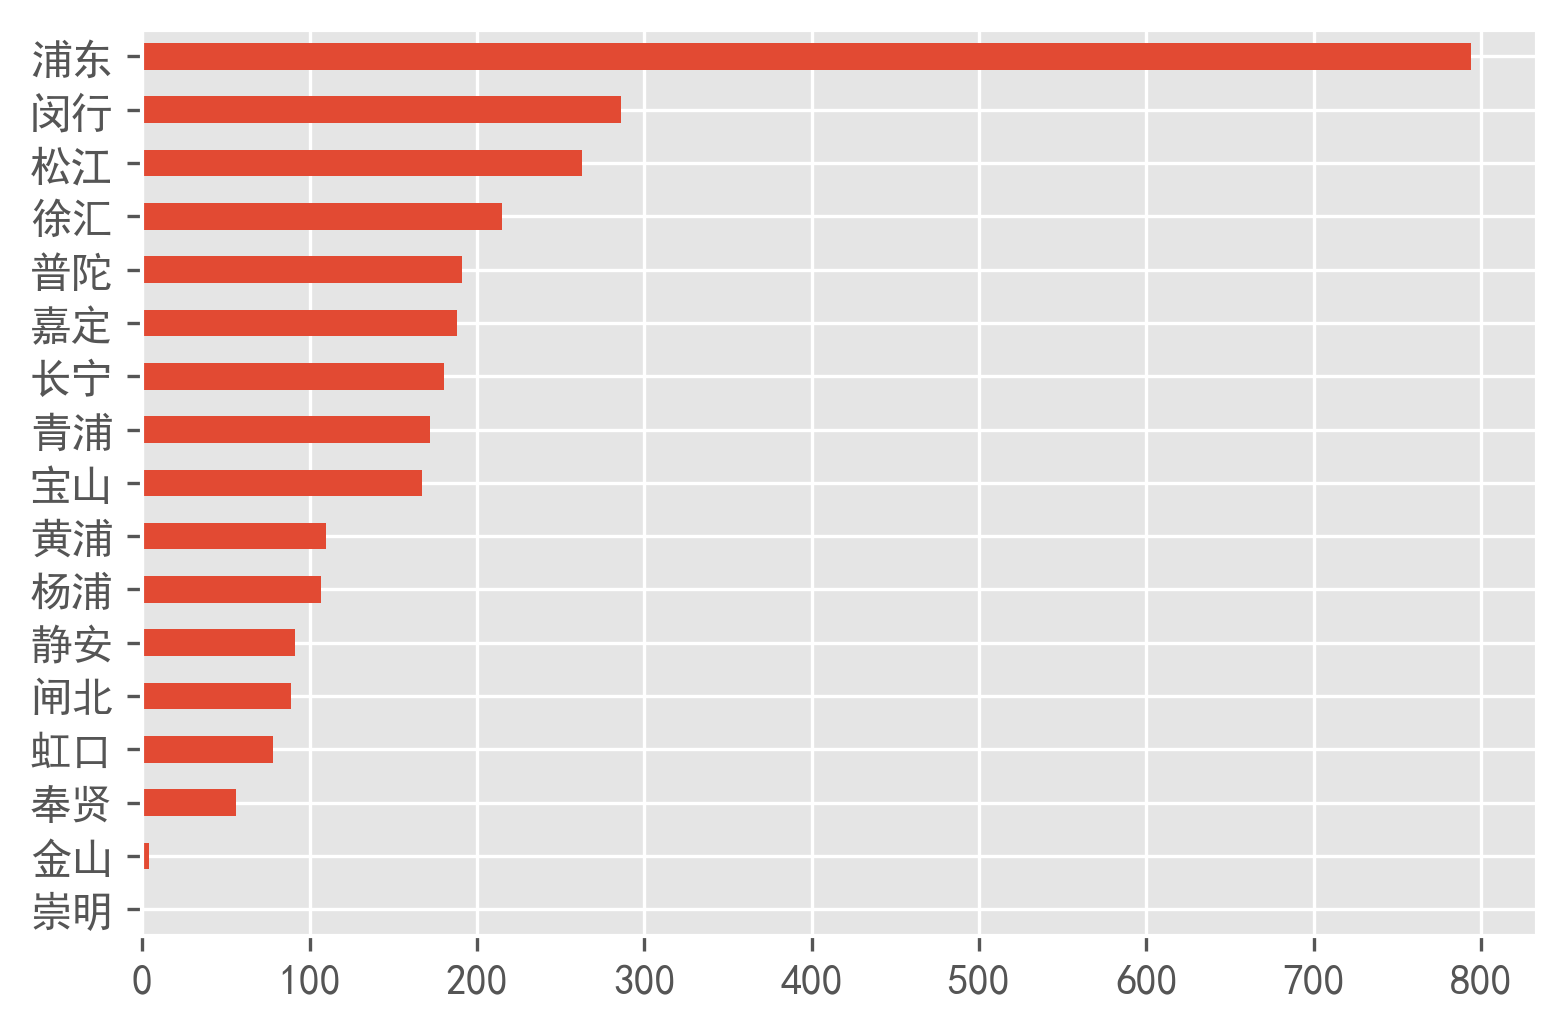

In [85]:
fig = plt.figure(dpi=300)
data.dropna(subset=['latitude', 'longitude'])[data['city']=='上海']['dist'].value_counts(ascending=True).plot.barh()

<ipython-input-86-e691eac81ce6>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.dropna(subset=['latitude', 'longitude'])[data['city']=='广州']['dist'].value_counts(ascending=True).plot.barh()


<AxesSubplot:>

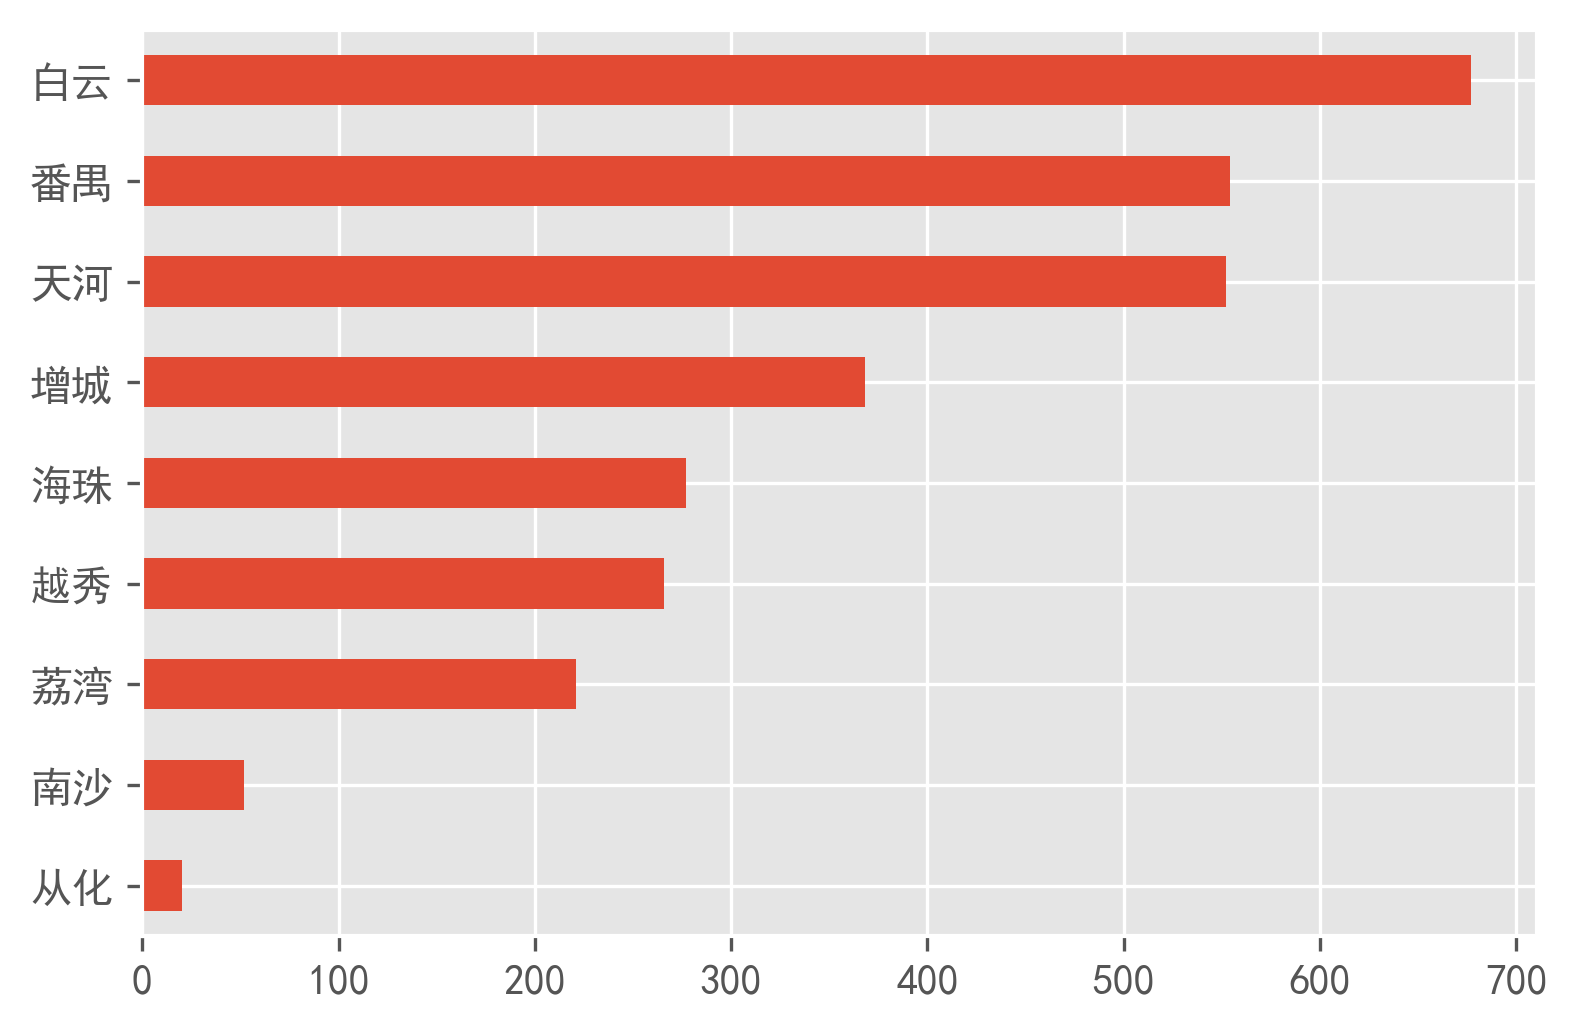

In [86]:
fig = plt.figure(dpi=300)
data.dropna(subset=['latitude', 'longitude'])[data['city']=='广州']['dist'].value_counts(ascending=True).plot.barh()

<ipython-input-87-15f4cafdd4a0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.dropna(subset=['latitude', 'longitude'])[data['city']=='深圳']['dist'].value_counts(ascending=True).plot.barh()


<AxesSubplot:>

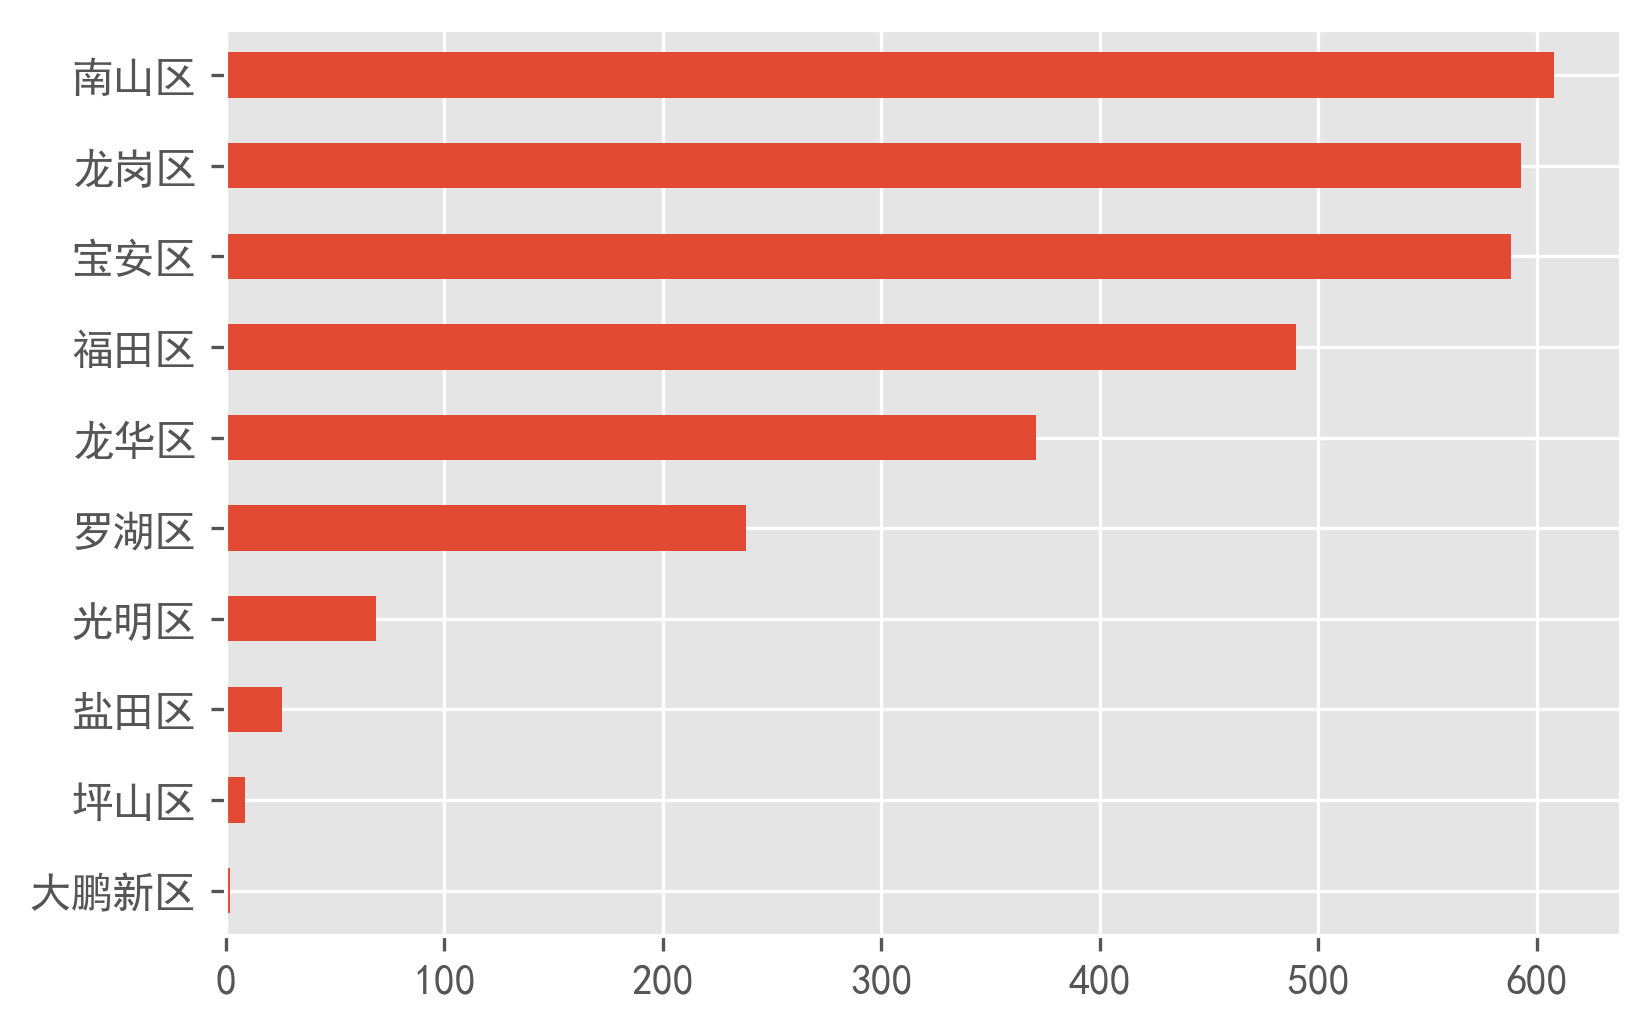

In [87]:
fig = plt.figure(dpi=300)
data.dropna(subset=['latitude', 'longitude'])[data['city']=='深圳']['dist'].value_counts(ascending=True).plot.barh()

### 2. 城市各区域的房价分布怎么样？

In [88]:
data['aver_price'] = np.round(data['rent_price_listing'] / data['rent_area'], 1)

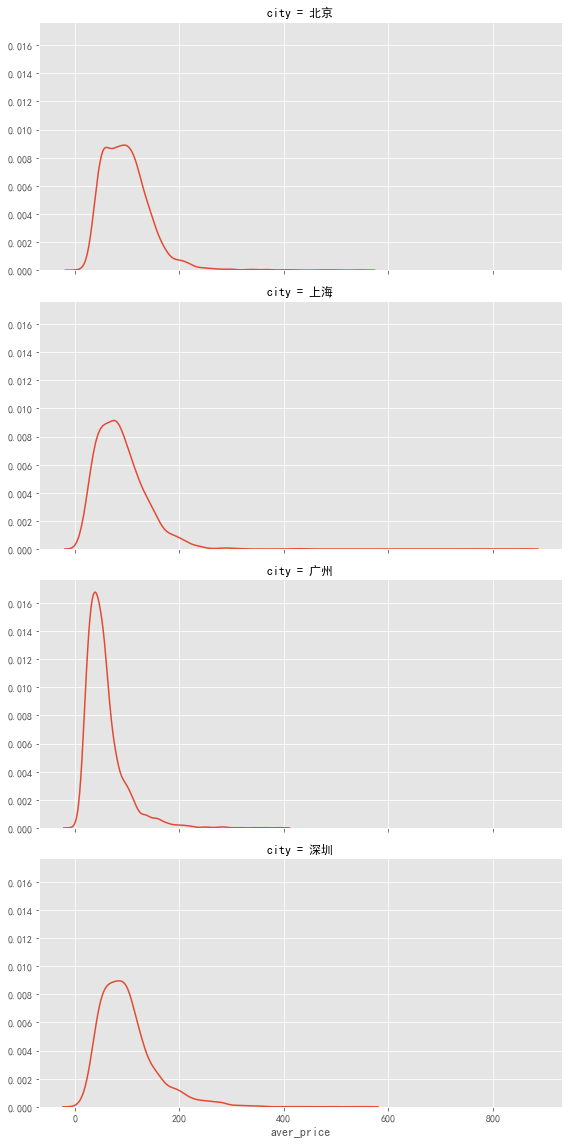

In [89]:
g = sns.FacetGrid(data, row="city", height=4, aspect=2)
g = g.map(sns.kdeplot, "aver_price")

In [90]:
# 由于平均租金基本上都集中在250元/平米/月以内，所以选取这部分数据绘制热力图
def get_city_zf_aver_price(city, city_short, col=['longitude', 'latitude', 'aver_price'], data=data):
    file_name = 'data_' + city_short + '_aver_price.csv'
    data_latlon = data.loc[(data['city']==city)&(data['aver_price']<=250), col].dropna(subset=['latitude', 'longitude'])
    data_latlon['longitude'] = data_latlon['longitude'].astype(str)
    data_latlon['latitude'] = data_latlon['latitude'].astype(str)
    data_latlon['latlon'] = data_latlon['longitude'].str.cat(data_latlon['latitude'], sep=',')
    data_latlon.to_csv(file_name, index=False)
    print(city+'的数据一共有{}条'.format(data_latlon.shape[0]))

In [91]:
get_city_zf_aver_price('北京', 'bj')
get_city_zf_aver_price('上海', 'sh')
get_city_zf_aver_price('广州', 'gz')
get_city_zf_aver_price('深圳', 'sz')

北京的数据一共有2969条
上海的数据一共有2979条
广州的数据一共有2976条
深圳的数据一共有2931条


### 4. 房屋大小对每平米租金的影响如何？

In [113]:
def area_price_relation(city, data=data):
    fig = plt.figure(dpi=100)
    g = sns.lineplot(x="rent_area",
                     y="aver_price",
                     data=data[(data['city']==city)&(data['rent_area']<150)],
                     ci=None)
    g.set_xlabel('面积', fontweight='bold')
    g.set_ylabel('每平米均价', fontweight='bold')
    return g

<AxesSubplot:xlabel='面积', ylabel='每平米均价'>

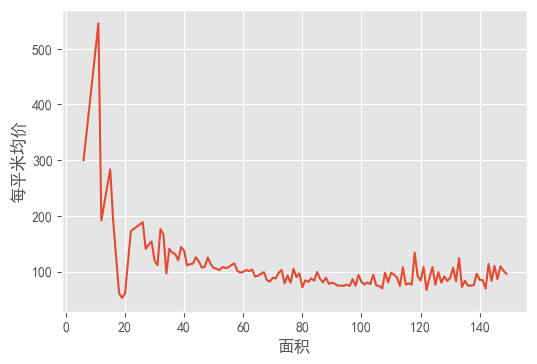

In [114]:
area_price_relation('北京')

<AxesSubplot:xlabel='面积', ylabel='每平米均价'>

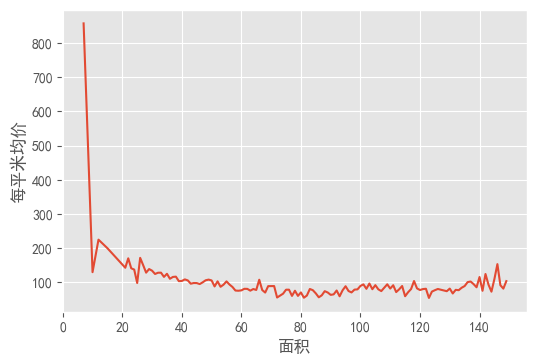

In [115]:
area_price_relation('上海')

<AxesSubplot:xlabel='面积', ylabel='每平米均价'>

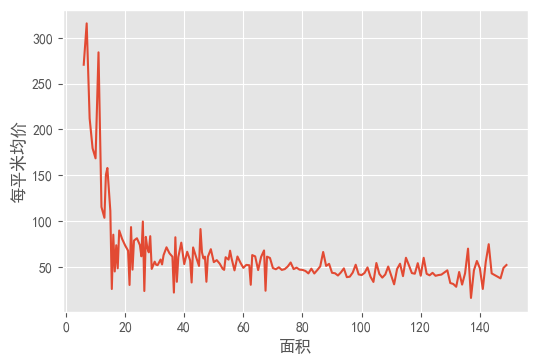

In [116]:
area_price_relation('广州')

<AxesSubplot:xlabel='面积', ylabel='每平米均价'>

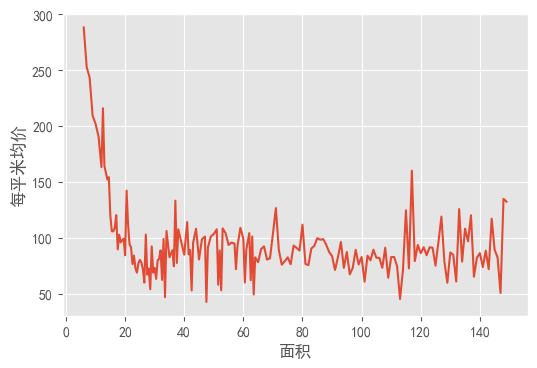

In [117]:
area_price_relation('深圳')

In [118]:
# 根据house_title和house_tag再造一个字段：is_dep，也就是“是否是公寓”
data['is_dep'] = (data['house_title'].str.contains('公寓') + data['house_tag'].str.contains('公寓')) > 0

In [119]:
# 每个城市房源的公寓占比
for city in ['北京', '上海', '广州', '深圳']:
    print(city+'的公寓占总房源量比重为:{}%。'.format(
        np.round(data[data['city']==city]['is_dep'].mean()*100, 2)))

北京的公寓占总房源量比重为:2.0%。
上海的公寓占总房源量比重为:4.17%。
广州的公寓占总房源量比重为:20.23%。
深圳的公寓占总房源量比重为:49.87%。


In [120]:
data[(data['city']=='广州')&
    (data['rent_area']>0)&
    (data['rent_area']<60)&
    (data['aver_price']>100)]['is_dep'].mean()

0.5729166666666666

### 5. 租个人房源好还是公寓好？

In [121]:
is_dep = data[(data['city'].isin(['广州','深圳']))&
             (data['is_dep']==1)].groupby('city')['aver_price'].mean()
not_dep = data[(data['city'].isin(['广州','深圳']))&
             (data['is_dep']==0)].groupby('city')['aver_price'].mean()

In [122]:
bar = Bar("个人房源和公寓的每平米租金差别", width=600)
bar.add("个人房源", not_dep.index, np.round(not_dep.values, 0), 
        legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar.add("公寓", is_dep.index, np.round(is_dep.values, 0),
       legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar

### 5. 精装和简装对房子价格的影响

In [123]:
data['decorated'] = data[data['house_tag'].notna()]['house_tag'].str.contains('精装')

In [124]:
decorated = data[data['decorated']==1].groupby('city')['aver_price'].mean()

In [125]:
not_decorated = data[data['decorated']==0].groupby('city')['aver_price'].mean()

In [126]:
bar = Bar("各城市精装和简装的每平米租金差别", width=600)
bar.add("精装(刷过墙)", decorated.index, np.round(decorated.values, 0), 
        legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar.add("简装(破房子)", not_decorated.index, np.round(not_decorated.values, 0),
       legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar

In [127]:
is_dec_dep = data[(data['decorated']==1)&
                  (data['is_dep']==1)&
                 (data['city'].isin(['广州', '深圳']))].groupby('city')['aver_price'].mean()

In [128]:
is_dec_not_dep = data[(data['decorated']==1)&
                      (data['is_dep']==0)&
                     (data['city'].isin(['广州', '深圳']))].groupby('city')['aver_price'].mean()

In [129]:
not_dec_dep = data[(data['decorated']==0)&
                   (data['is_dep']==0)&
                  (data['city'].isin(['广州', '深圳']))].groupby('city')['aver_price'].mean()

In [130]:
bar = Bar("各城市装修和房源类型的每平米租金差别", width=600)
bar.add("精装公寓", is_dec_dep.index, np.round(is_dec_dep.values, 0), 
        legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar.add("精装个人房源", is_dec_not_dep.index, np.round(is_dec_not_dep.values, 0),
       legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar.add("简装个人房源", not_dec_dep.index, np.round(not_dec_dep.values, 0),
       legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar

### 7. 北方集中供暖对价格的影响

In [131]:
data['ct_heating'] = data['house_tag'].str.contains('集中供暖')

In [132]:
data[data['city']=='北京'].groupby('ct_heating')['aver_price'].mean()

ct_heating
False     92.740079
True     100.542810
Name: aver_price, dtype: float64

### 8. 各城市房屋租售比

In [133]:
zs_ratio = [57036, 62779, 32039, 56758]/(data.groupby('city')['rent_price_listing'].sum()/data.groupby('city')['rent_area'].sum())/12

In [134]:
bar = Bar("各城市房屋租售比(租多少年可以在该城市买下一套房)", width=450)
bar.add("", zs_ratio.index, np.round(zs_ratio.values, 0), 
        legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar

### 9. 北上广深租房时都看重什么？

In [135]:
def layout_top3(city, data):
    layout_data = data[data['city']==city]['layout'].value_counts().nlargest(3)
    bar = Bar(city+"最受欢迎的户型", width=600)
    bar.add("", layout_data.index, layout_data.values, 
        legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
    return bar

In [136]:
layout_top3('北京', data)

In [137]:
layout_top3('上海', data)

In [138]:
layout_top3('广州', data)

In [139]:
layout_top3('深圳', data)

In [140]:
from pyecharts import WordCloud

In [141]:
bj_tag = []
for st in data[data['city']=='北京'].dropna(subset=['house_tag'])['house_tag']:
    bj_tag.extend(st.split(' '))

name, value = WordCloud.cast(Counter(bj_tag))
wordcloud = WordCloud(width=500, height=500)
wordcloud.add("", name, value, word_size_range=[20, 100])
wordcloud

NameError: name 'Counter' is not defined

In [142]:
sh_tag = []
for st in data[data['city']=='上海'].dropna(subset=['house_tag'])['house_tag']:
    sh_tag.extend(st.split(' '))

name, value = WordCloud.cast(Counter(sh_tag))
wordcloud = WordCloud(width=500, height=500)
wordcloud.add("", name, value, word_size_range=[20, 100])
wordcloud

NameError: name 'Counter' is not defined

In [143]:
gz_tag = []
for st in data[data['city']=='广州'].dropna(subset=['house_tag'])['house_tag']:
    gz_tag.extend(st.split(' '))

name, value = WordCloud.cast(Counter(gz_tag))
wordcloud = WordCloud(width=500, height=500)
wordcloud.add("", name, value, word_size_range=[20, 100])
wordcloud

NameError: name 'Counter' is not defined

In [144]:
sz_tag = []
for st in data[data['city']=='深圳'].dropna(subset=['house_tag'])['house_tag']:
    sz_tag.extend(st.split(' '))

name, value = WordCloud.cast(Counter(sz_tag))
wordcloud = WordCloud(width=500, height=500)
wordcloud.add("", name, value, word_size_range=[20, 100])
wordcloud

NameError: name 'Counter' is not defined